
# **Introduction**

This project focuses on clustering customer data using advanced feature engineering and machine learning techniques to identify distinct behavioral patterns related to credit utilization, payment compliance, and cash advance usage. By leveraging engineered features and unsupervised learning methods like KMeans, the objective is to segment customers effectively into meaningful groups to facilitate targeted strategies for risk management and customer relationship enhancement.

# **Objective**

The primary objective is to:

1. Segment customers into distinct clusters based on their credit card usage, payment behaviors, and risk of default.

2. Provide actionable insights into customer behavior to help:

 1. Mitigate the risk of default by identifying high-risk groups.
 2. Enhance profitability through targeted offers to specific clusters.
 3. Optimize resource allocation by prioritizing high-value customers.


Enhance profitability through targeted offers to specific clusters.
Optimize resource allocation by prioritizing high-value customers.

By employing feature engineering, clustering, and evaluation techniques, this project aims to uncover hidden patterns and structure in the data that can aid in strategic decision-making.

# **Dataset Description**

Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

Data link : https://drive.google.com/file/d/1_7x_gz3B53440OcB8d9ErMlbyIETZh7X/view?usp=sharing

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset.
cc_df = pd.read_csv('CC GENERAL.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
cc_df.tail() # checking the data tail.

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
cc_df.shape # Checking rows and columns.

(8950, 18)

In [ ]:
cc_df.info() # dataset imformation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
cc_df.describe() # Dataset description.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
cc_df.isnull().sum() # Sum of null values in the columns.

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
cc_df.duplicated().sum() # Sum of duplicated in the columns.

0

In [ ]:
cc_df[cc_df['CREDIT_LIMIT'].isnull()] # Checking the null row.

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [ ]:
cc_df[cc_df['MINIMUM_PAYMENTS'].isnull()] # Checking the null row.

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


**Initial Findings**

we have 8950 rows and 18 column in this datasets and all the columns are numeric datatypes except the CUST_ID which is object type and there is no need to convert this datatype as this will not give the insights we are looking for.

And, the summary of the datasets description also provides the basic idea of the data in which the range of all the columns are very wide.but removing the extreme values here as outliers can hampers the data of the customers which is a indication of the transactions and valuable for identifying the segments(category of risks). so, we critically analyse the dataset distributions to check for any potential outliers.

From this we can clearly see that there are 1 null row in CREDIT_LIMIT column and 313 null rows in MINIMUM_PAYMENTS column. I will remove the 315 null rows because
 1. It is very small as compared to the length of datsets we have.
 2. Imputing the null with some central tendencies or any calculated values based on the other columns can deviate the original datasets.and, this will aslo affects the ML model.

There is no any duplicate rows in this data.

In [ ]:
cc_df.dropna(inplace=True) # Dropping the null rows.

In [ ]:
cc_df.isnull().sum() # Rechecking the summ of null values.

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
cc_df.shape # Rechecking the rows and columns.

(8636, 18)

# **Exploratory Data Analysis**

In this Section, i will explore the top customers in terms of key features,Count and distribution of some important variables and relatiomship between some key variables.

The two bar charts below gives the top customers with lowest and highest balance.

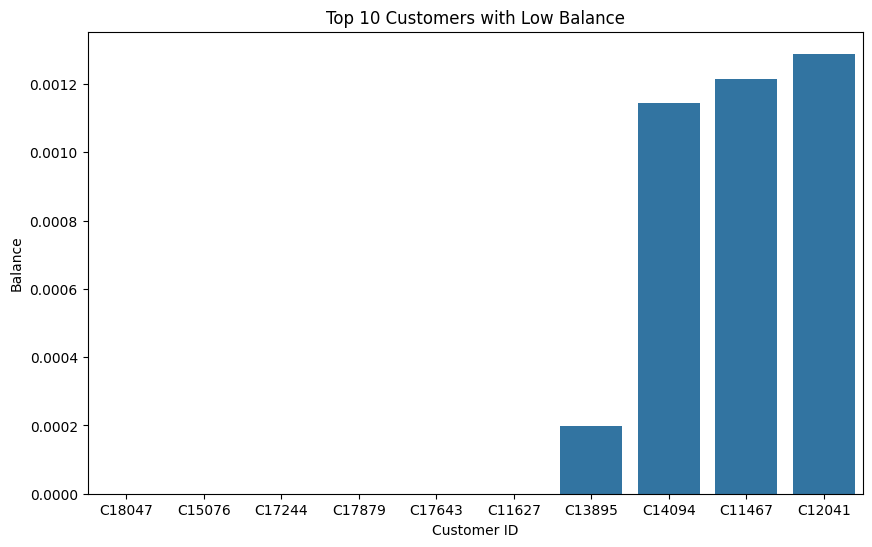

In [ ]:
# Top 10 customers with low Balance.
plt.figure(figsize=(10,6))
sns.barplot(x=cc_df.sort_values(by='BALANCE', ascending=True).head(10)['CUST_ID'], y=cc_df.sort_values(by='BALANCE', ascending=True).head(10)['BALANCE'])
plt.title('Top 10 Customers with Low Balance')
plt.xlabel('Customer ID')
plt.ylabel('Balance')
plt.show()

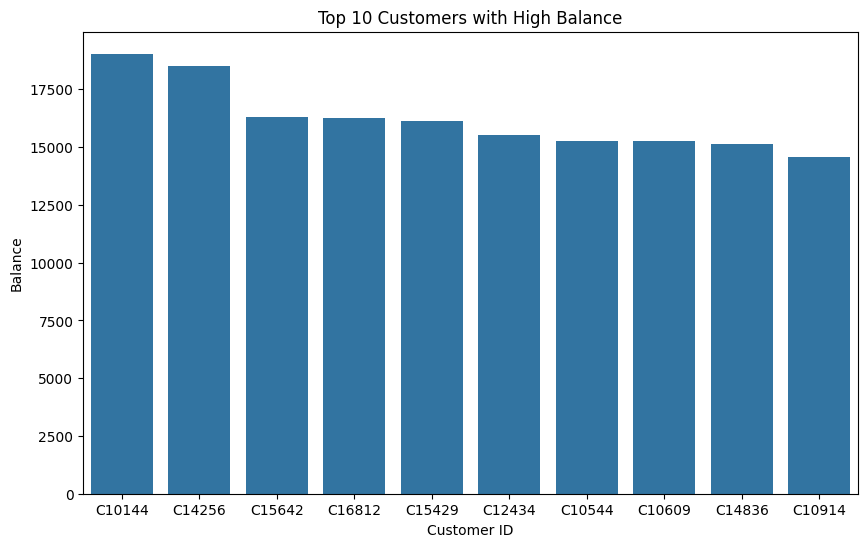

In [ ]:
## Top 10 customers with high Balance.
plt.figure(figsize=(10,6))
sns.barplot(x=cc_df.sort_values(by='BALANCE', ascending=False).head(10)['CUST_ID'], y=cc_df.sort_values(by='BALANCE', ascending=False).head(10)['BALANCE'])
plt.title('Top 10 Customers with High Balance')
plt.xlabel('Customer ID')
plt.ylabel('Balance')
plt.show()

The bar chart below gives the top customers with highest purchases.

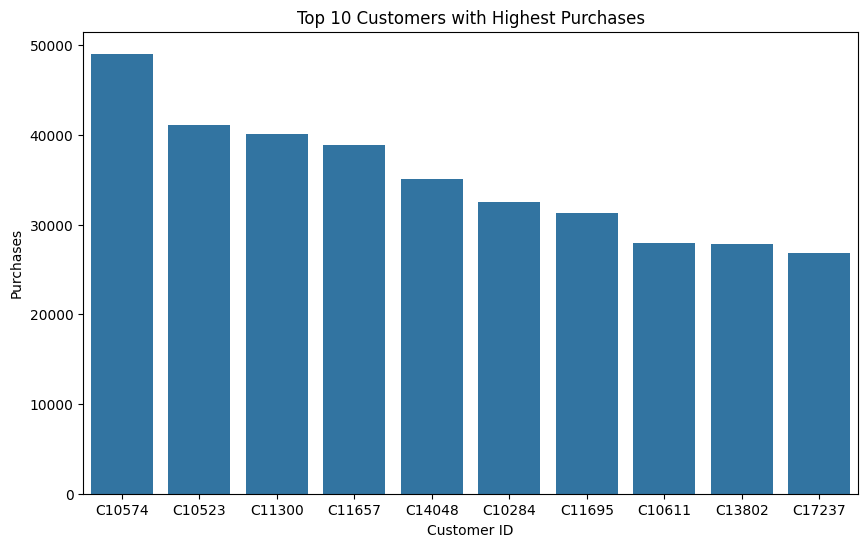

In [ ]:
# Top 10 customers with Highest Purchases.
plt.figure(figsize=(10,6))
sns.barplot(x=cc_df.sort_values(by='PURCHASES', ascending=False).head(10)['CUST_ID'], y=cc_df.sort_values(by='PURCHASES', ascending=False).head(10)['PURCHASES'])
plt.title('Top 10 Customers with Highest Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Purchases')
plt.show()

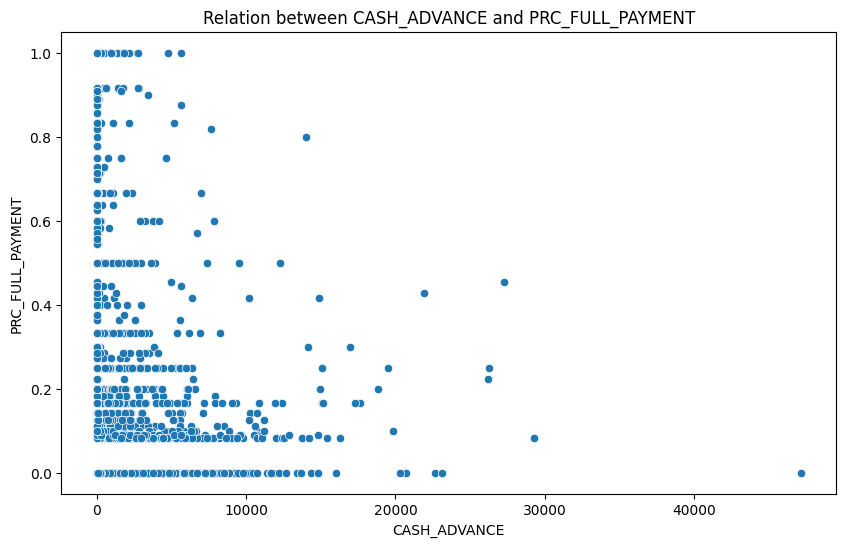

In [ ]:
# Relation between CASH_ADVANCE and PRC_FULL_PAYMENT.
plt.figure(figsize=(10,6))
sns.scatterplot(x=cc_df['CASH_ADVANCE'], y=cc_df['PRC_FULL_PAYMENT'])
plt.title('Relation between CASH_ADVANCE and PRC_FULL_PAYMENT')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PRC_FULL_PAYMENT')
plt.show()

Here, as the cash advance increases the proportion of full payment is lowering.

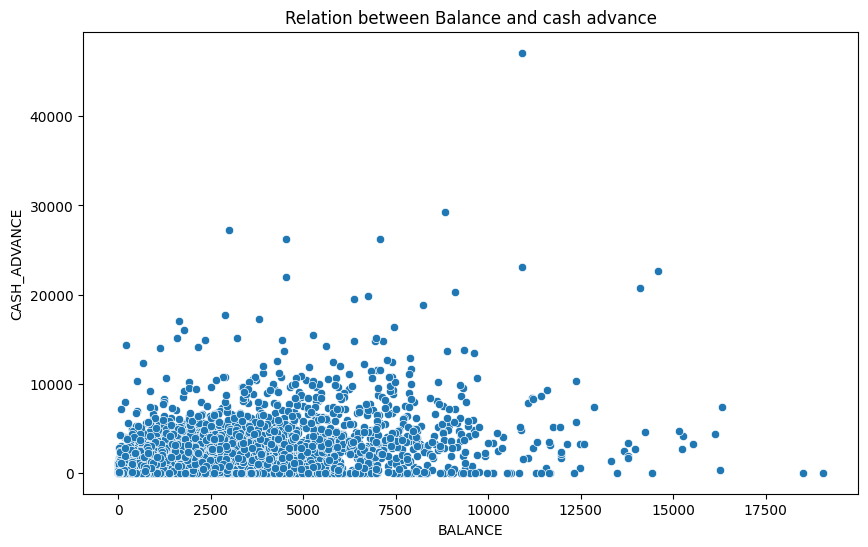

In [ ]:
# Relation between Balance and cash advance.
plt.figure(figsize=(10,6))
sns.scatterplot(x=cc_df['BALANCE'], y=cc_df['CASH_ADVANCE'])
plt.title('Relation between Balance and cash advance')
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')
plt.show()

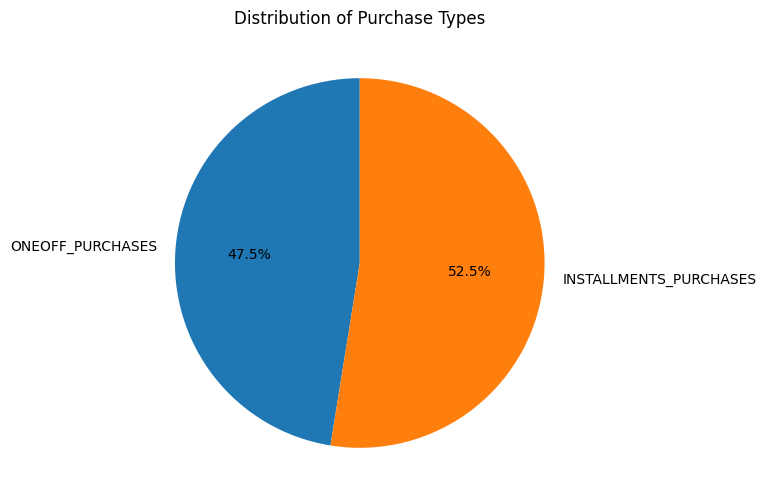

In [ ]:
# Count the occurrences of 'ONEOFF_PURCHASES' and 'INSTALLMENTS_PURCHASES'
no_of_ONEOFF_PURCHASES = cc_df['ONEOFF_PURCHASES'].value_counts()
no_of_INSTALLMENTS_PURCHASES = cc_df['INSTALLMENTS_PURCHASES'].value_counts()

# Create a DataFrame for the pie chart data
pie_data = pd.DataFrame({
    'Purchase Type': ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],
    'Count': [len(no_of_ONEOFF_PURCHASES), len(no_of_INSTALLMENTS_PURCHASES)]
})

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_data['Count'], labels=pie_data['Purchase Type'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Purchase Types')
plt.show()

Data seems to be unbias in terms of type of purchases.

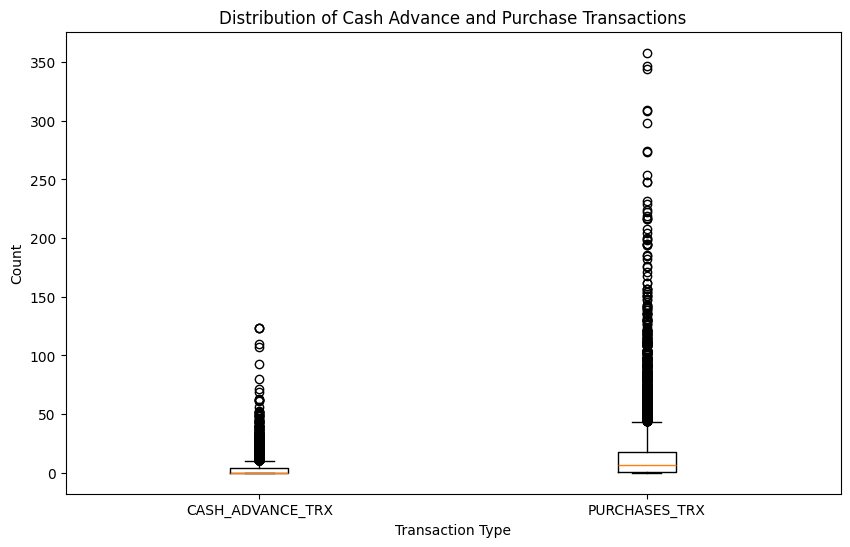

In [ ]:
# Visualizing count of cash advance transaction and purchase transaction.
plt.figure(figsize=(10,6))
plt.boxplot([cc_df['CASH_ADVANCE_TRX'], cc_df['PURCHASES_TRX']])
plt.xticks([1, 2], ['CASH_ADVANCE_TRX', 'PURCHASES_TRX'])
plt.title('Distribution of Cash Advance and Purchase Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

Visualizing the datasets distributions with the help of distplot using the subplot from matplotlib.

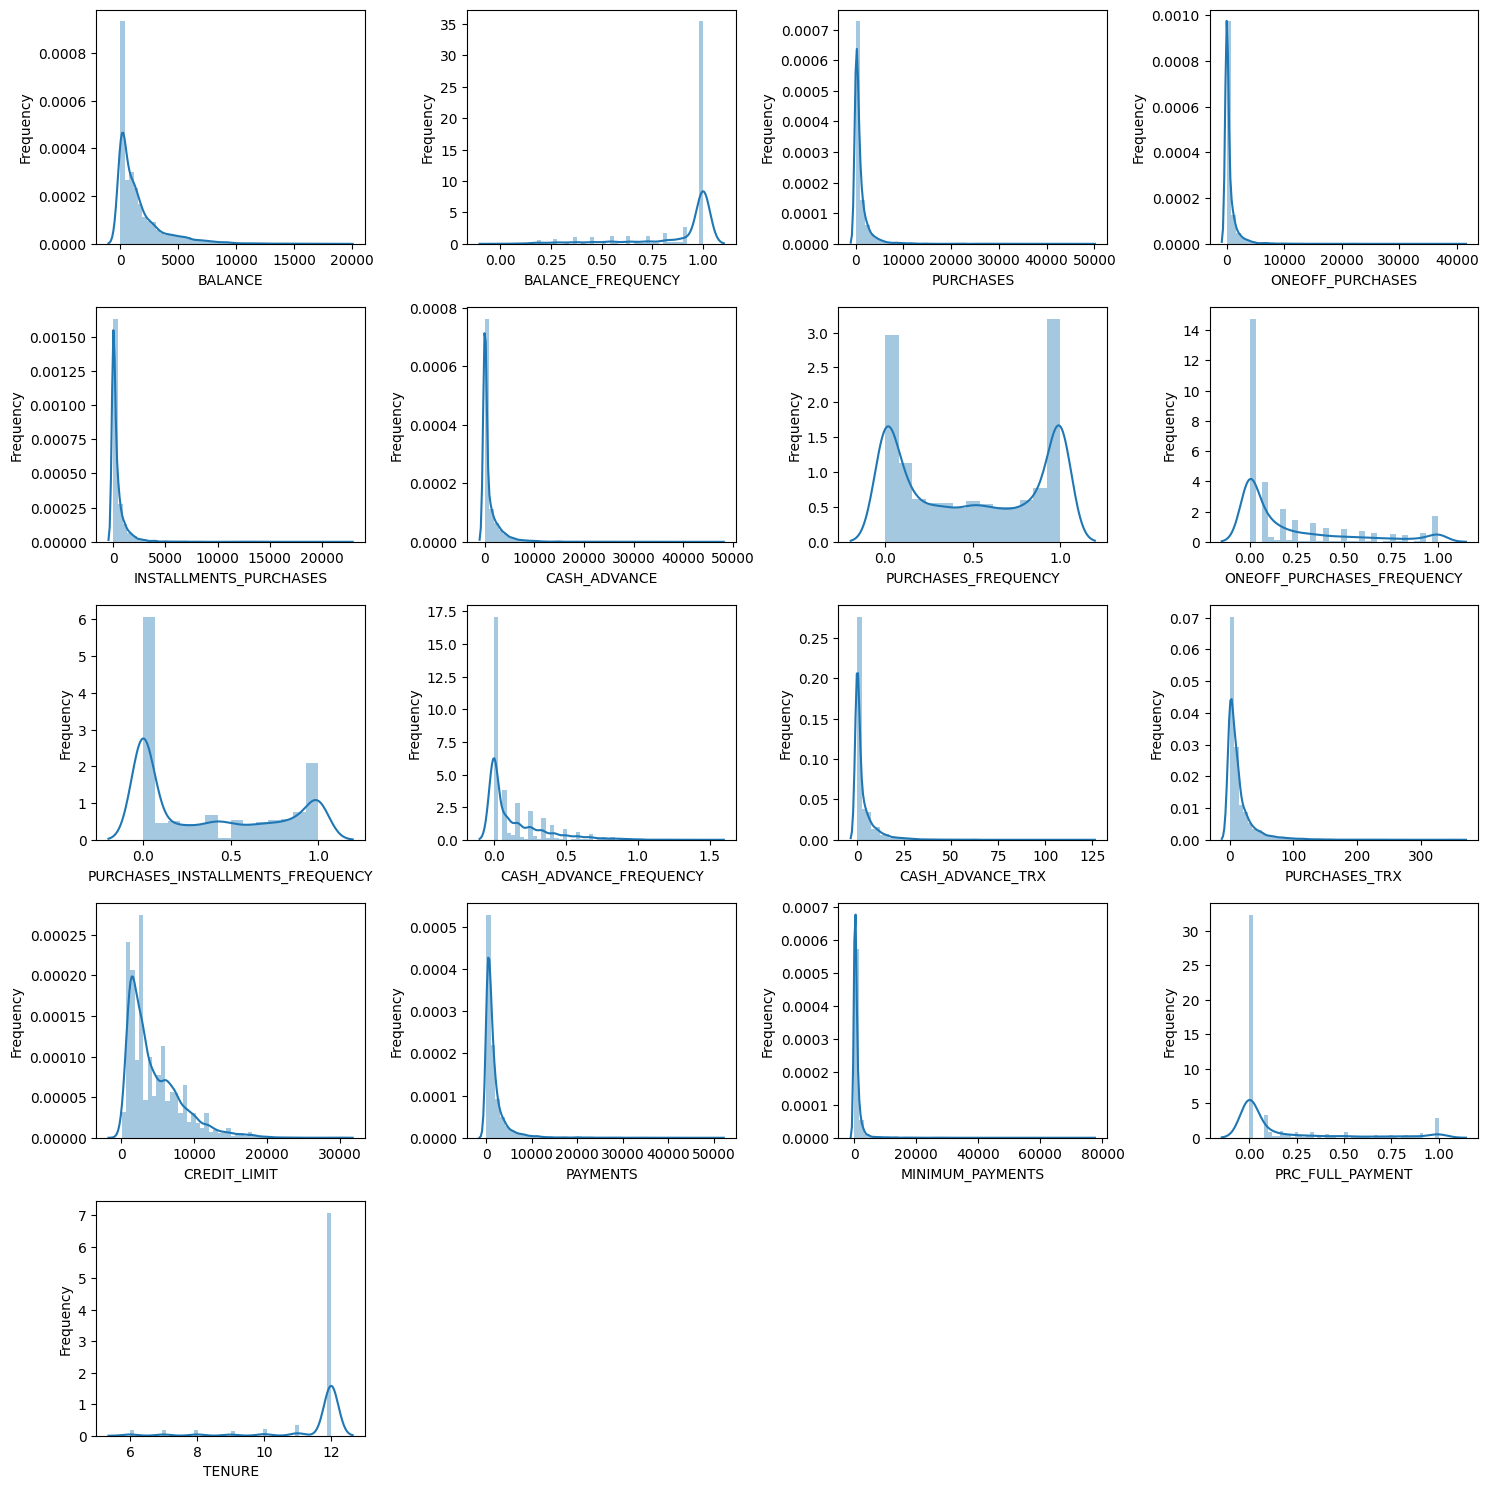

In [ ]:
# Select the variables to visualize
variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Create distplots
# Adjust the subplot grid to accommodate all variables
num_rows = 5
num_cols = 4
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.distplot(cc_df[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most of the columns are right skewed and some columns containing frequencies between 0 to 1.
I will apply the impact of log function in the distribution range.

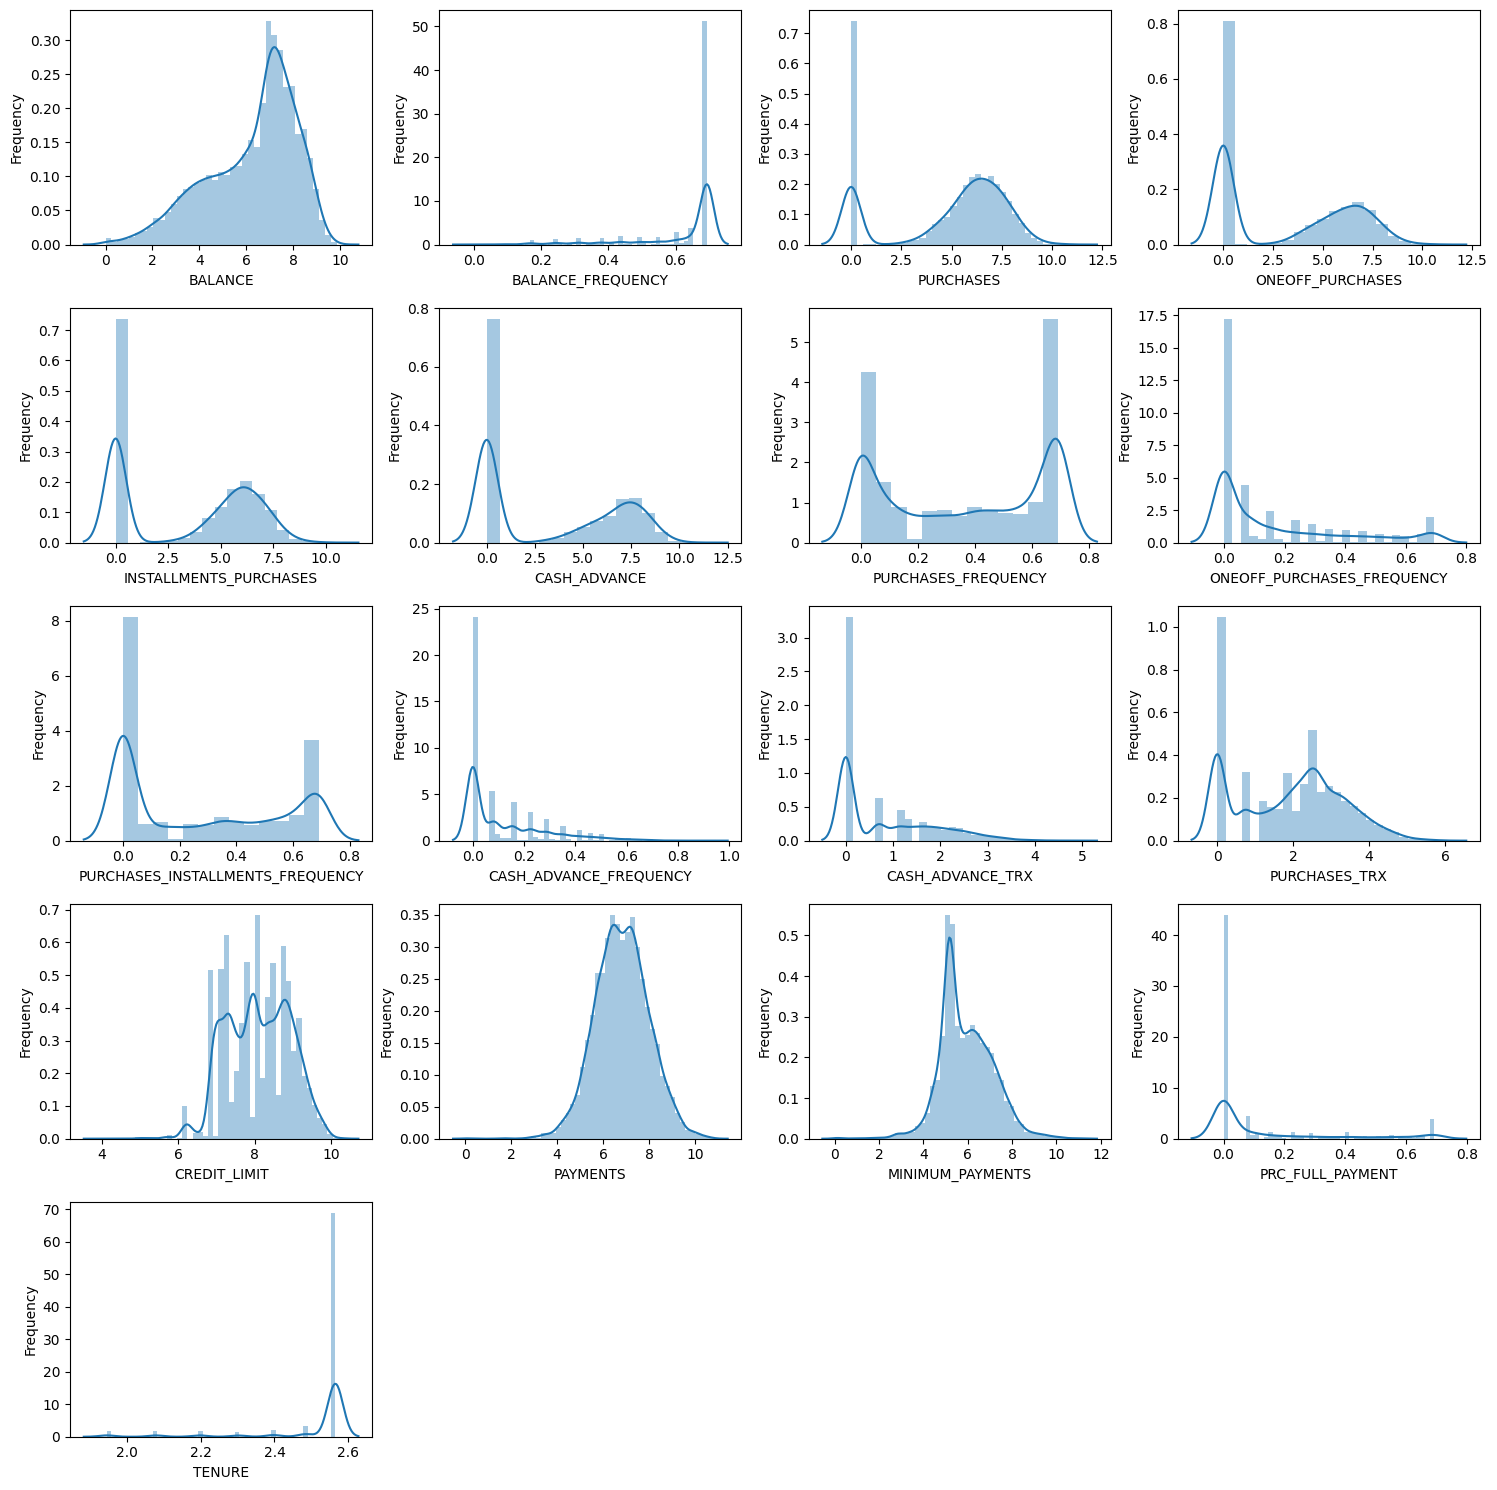

In [ ]:
num_rows = 5
num_cols = 4
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.distplot(np.log1p(cc_df[var]), kde=True) # Applying log function from numpy in all the columns to see the impact.
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Now, Applying log function clearly reduced the size of the distribution and after applying in the dataframe it will also makes the calculation easier.

# **Feature Engineering**
In this section, i will select the features important for my business objectives and do some engineering with these features i.e numeric calculations for creating some key features and scaling with log transformation and minmax scaler from sklearn.

In [ ]:
# Selection some useful features for understanding the customers.
featured_df = cc_df[['CUST_ID', 'BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS','CASH_ADVANCE','PRC_FULL_PAYMENT']].copy()
featured_df

,CUST_ID,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE,PRC_FULL_PAYMENT
0,C10001,40.900749,95.40,1000.0,201.802084,139.509787,0.000000,0.000000
1,C10002,3202.467416,0.00,7000.0,4103.032597,1072.340217,6442.945483,0.222222
2,C10003,2495.148862,773.17,7500.0,622.066742,627.284787,0.000000,0.000000
4,C10005,817.714335,16.00,1200.0,678.334763,244.791237,0.000000,0.000000
5,C10006,1809.828751,1333.28,1800.0,1400.057770,2407.246035,0.000000,0.000000
...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,20.90,500.0,58.644883,43.473717,0.000000,0.000000
8945,C19186,28.493517,291.12,1000.0,325.594462,48.886365,0.000000,0.500000
8947,C19188,23.398673,144.40,1000.0,81.270775,82.418369,0.000000,0.250000
8948,C19189,13.457564,0.00,500.0,52.549959,55.755628,36.558778,0.250000


In [ ]:
# Creating some new features.
# Small epsilon to avoid division by zero
epsilon = 1e-10
featured_df['Credit_Utilization_Ratio'] = featured_df['BALANCE'] / (featured_df['CREDIT_LIMIT'] + epsilon) # This provides the details about the customer's credit utilization.
featured_df['Minimum_Payment_Compliance_Ratio'] = featured_df['PAYMENTS'] / (featured_df['MINIMUM_PAYMENTS'] + epsilon) # This tells about the customer's is paying responsibly or not.
featured_df['Cash_Advance_Ratio'] = featured_df['CASH_ADVANCE'] / (featured_df['PURCHASES'] + featured_df['CASH_ADVANCE'] + epsilon) # gives idea about the customer's cash taken in total credit.
featured_df['Full_Payment_Compliance_Proportion'] = featured_df['PRC_FULL_PAYMENT'] # This is same as the data provided(Customers full payment proportion).
featured_df

,CUST_ID,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE,PRC_FULL_PAYMENT,Credit_Utilization_Ratio,Minimum_Payment_Compliance_Ratio,Cash_Advance_Ratio,Full_Payment_Compliance_Proportion
0,C10001,40.900749,95.40,1000.0,201.802084,139.509787,0.000000,0.000000,0.040901,1.446508,0.000000,0.000000
1,C10002,3202.467416,0.00,7000.0,4103.032597,1072.340217,6442.945483,0.222222,0.457495,3.826241,1.000000,0.222222
2,C10003,2495.148862,773.17,7500.0,622.066742,627.284787,0.000000,0.000000,0.332687,0.991682,0.000000,0.000000
4,C10005,817.714335,16.00,1200.0,678.334763,244.791237,0.000000,0.000000,0.681429,2.771075,0.000000,0.000000
5,C10006,1809.828751,1333.28,1800.0,1400.057770,2407.246035,0.000000,0.000000,1.005460,0.581601,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,20.90,500.0,58.644883,43.473717,0.000000,0.000000,0.011743,1.348973,0.000000,0.000000
8945,C19186,28.493517,291.12,1000.0,325.594462,48.886365,0.000000,0.500000,0.028494,6.660231,0.000000,0.500000
8947,C19188,23.398673,144.40,1000.0,81.270775,82.418369,0.000000,0.250000,0.023399,0.986076,0.000000,0.250000
8948,C19189,13.457564,0.00,500.0,52.549959,55.755628,36.558778,0.250000,0.026915,0.942505,1.000000,0.250000


In [ ]:
# Dropping the other columns except the four featured engineered columns and stores the values in new dataframe.
engg_df = featured_df.drop(columns=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS','CASH_ADVANCE','PRC_FULL_PAYMENT'])
engg_df

,CUST_ID,Credit_Utilization_Ratio,Minimum_Payment_Compliance_Ratio,Cash_Advance_Ratio,Full_Payment_Compliance_Proportion
0,C10001,0.040901,1.446508,0.000000,0.000000
1,C10002,0.457495,3.826241,1.000000,0.222222
2,C10003,0.332687,0.991682,0.000000,0.000000
4,C10005,0.681429,2.771075,0.000000,0.000000
5,C10006,1.005460,0.581601,0.000000,0.000000
...,...,...,...,...,...
8943,C19184,0.011743,1.348973,0.000000,0.000000
8945,C19186,0.028494,6.660231,0.000000,0.500000
8947,C19188,0.023399,0.986076,0.000000,0.250000
8948,C19189,0.026915,0.942505,1.000000,0.250000


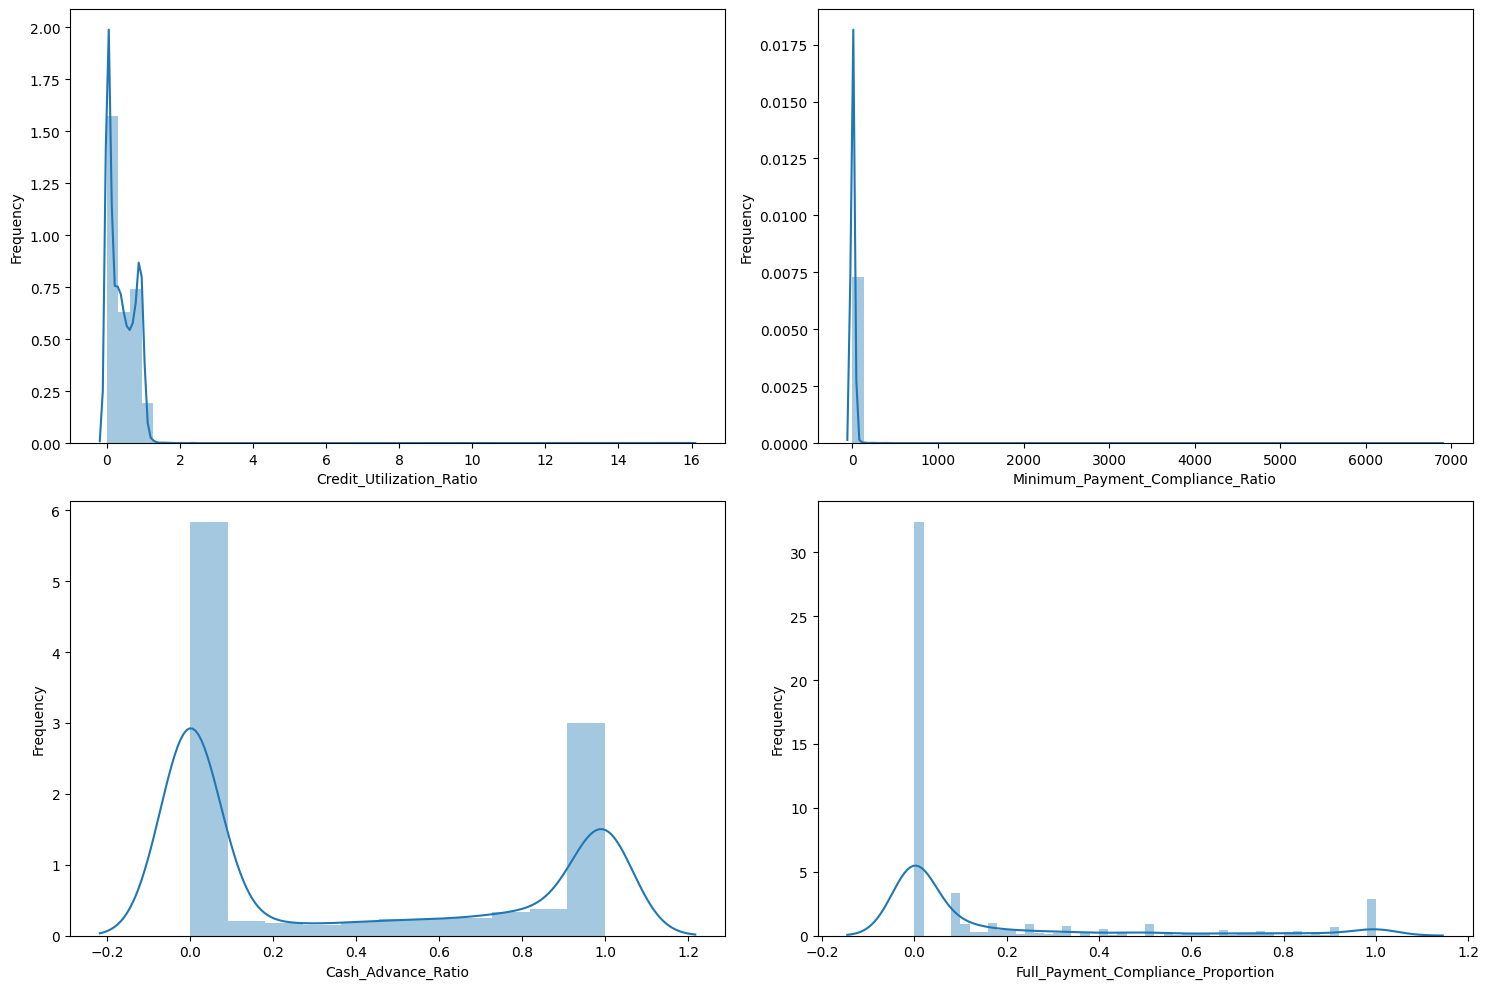

In [ ]:
# Plotting the distribution of Credit_Utilization_Ratio	,Minimum_Payment_Compliance_Ratio	,Cash_Advance_Ratio	,Full_Payment_Compliance_Proportion
features = ['Credit_Utilization_Ratio', 'Minimum_Payment_Compliance_Ratio', 'Cash_Advance_Ratio', 'Full_Payment_Compliance_Proportion']

# Create distplots
# Adjust the subplot grid to accommodate all variables
num_rows = 2
num_cols = 2
plt.figure(figsize=(15, 10))
for i, var in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.distplot(engg_df[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The data distribution a highly skewed. so, i use the log function to reduce the range of distribution without applying in my dataframe.

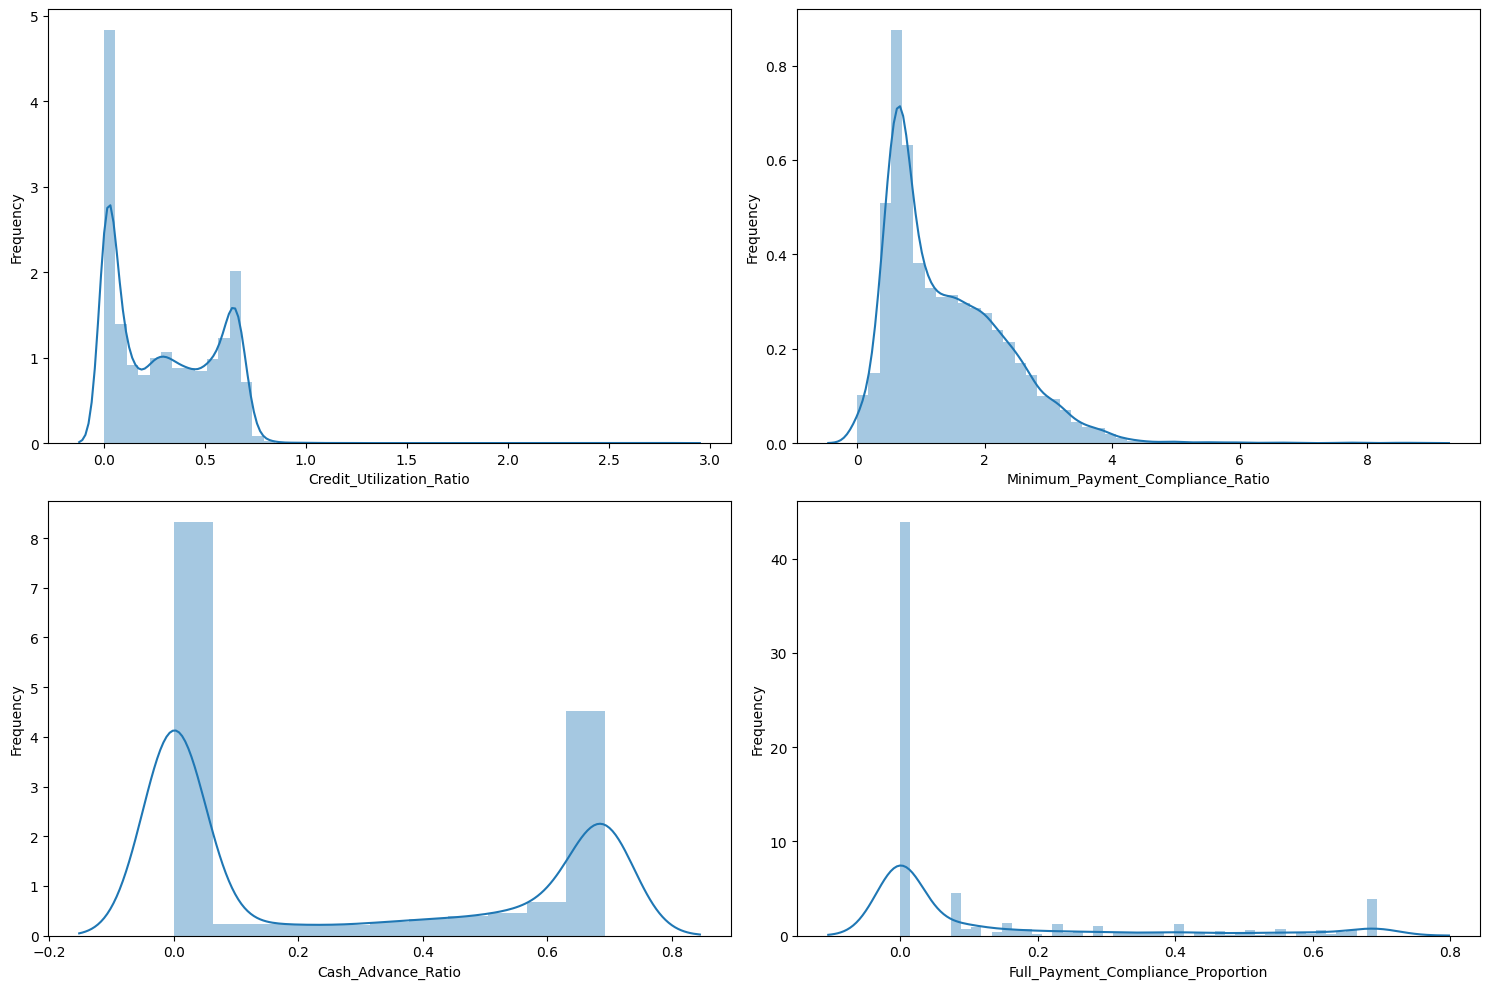

In [ ]:
num_rows = 2
num_cols = 2
plt.figure(figsize=(15, 10))
for i, var in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.distplot(np.log1p(engg_df[var]), kde=True) # using log from numpy.
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# applying log transformation to the engg_df as we can clearly see the reduction in range.
for column in engg_df.select_dtypes(include=np.number).columns:
    engg_df[column] = np.log1p(engg_df[column])
engg_df.head()

,CUST_ID,Credit_Utilization_Ratio,Minimum_Payment_Compliance_Ratio,Cash_Advance_Ratio,Full_Payment_Compliance_Proportion
0,C10001,0.040086,0.894662,0.000000,0.000000
1,C10002,0.376719,1.574068,0.693147,0.200671
2,C10003,0.287197,0.688979,0.000000,0.000000
4,C10005,0.519644,1.327360,0.000000,0.000000
5,C10006,0.695874,0.458438,0.000000,0.000000


In [ ]:
# scaling our data using standardscaler.
X_features = engg_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)
X  # This data will be used in my models

array([[-1.05361753, -0.54472276, -0.88098306, -0.56960691],
       [ 0.29670894,  0.18988478,  1.34998437,  0.36722205],
       [-0.06239056, -0.76711698, -0.88098306, -0.56960691],
       ...,
       [-1.12163796, -0.77016443, -0.88098306,  0.47213728],
       [-1.10787863, -0.79414918,  1.34998437,  0.47213728],
       [-0.12945652, -0.92855832, -0.56222418, -0.56960691]])

i am reducing the dimensions with the help of sklearn library named Principal Component Analysis and explained variance of the principal components.

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA (keep all components initially)
pca = PCA()
pca_transformed = pca.fit_transform(X)

# Check explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to summarize variance explained
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance (%)': explained_variance * 100,
    'Cumulative Variance (%)': explained_variance.cumsum() * 100
})
print(pca_summary)


  Principal Component  Explained Variance (%)  Cumulative Variance (%)
0                 PC1               56.831846                56.831846
1                 PC2               20.233962                77.065808
2                 PC3               13.519819                90.585627
3                 PC4                9.414373               100.000000


Using elbow method to find the optimal number of clusters.

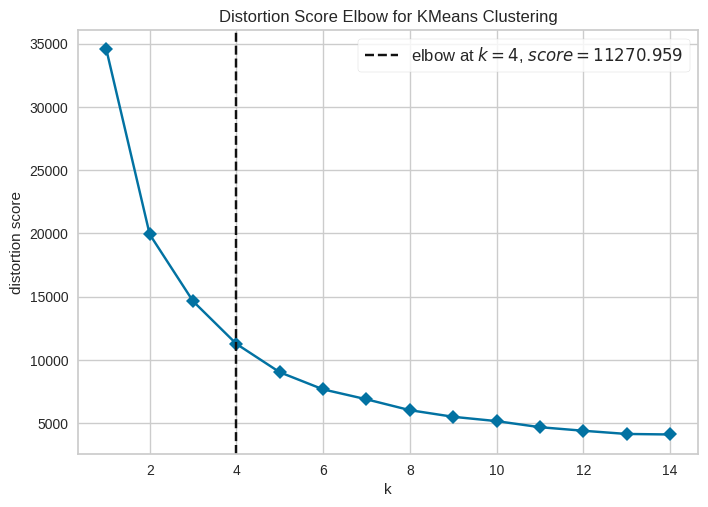

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

Using SilhouetteVisualizer and silhouette_score of number of clusters ranging between 2 to 9.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.3898007446060931


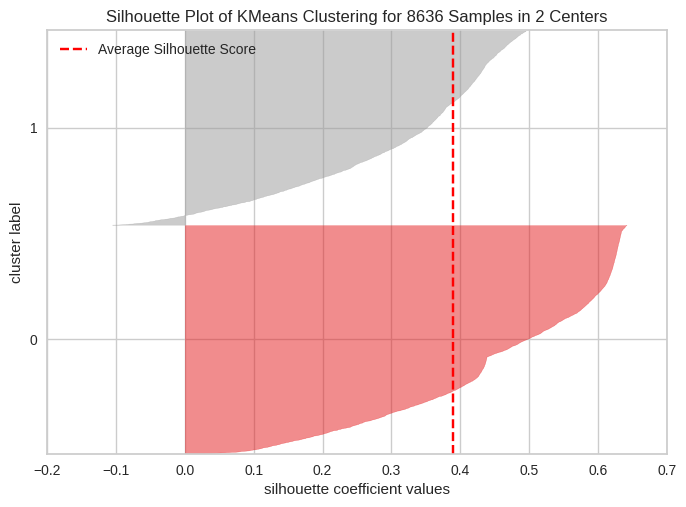

For n_clusters = 3, silhouette score is 0.3830315057036641


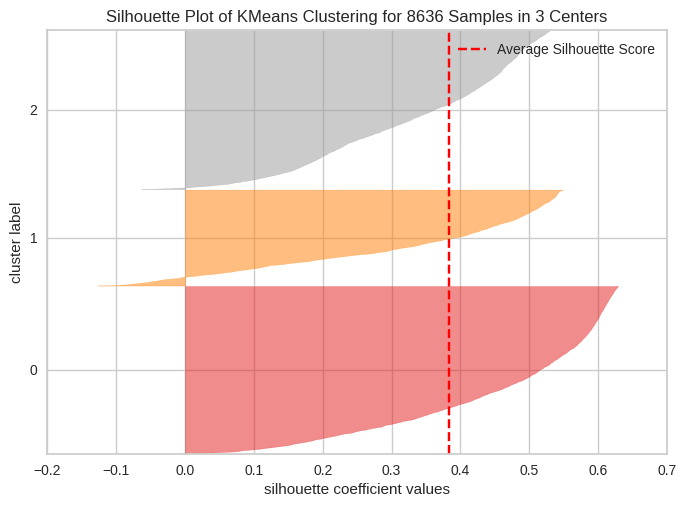

For n_clusters = 4, silhouette score is 0.38150754154153266


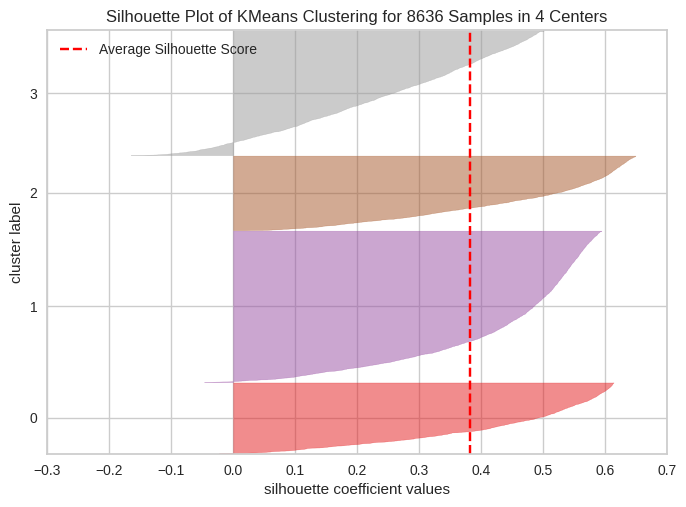

For n_clusters = 5, silhouette score is 0.3308753189758073


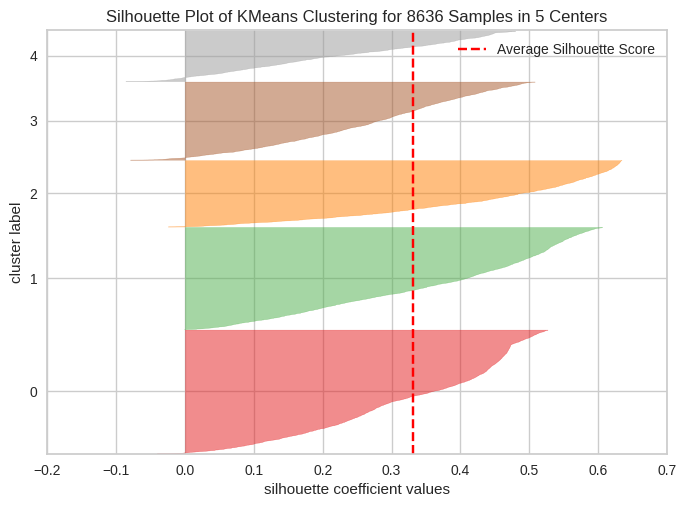

For n_clusters = 6, silhouette score is 0.40007222966462425


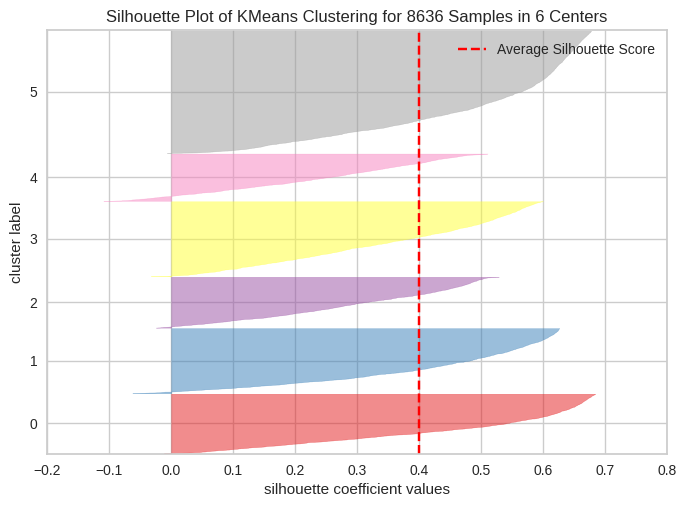

For n_clusters = 7, silhouette score is 0.3771280209720991


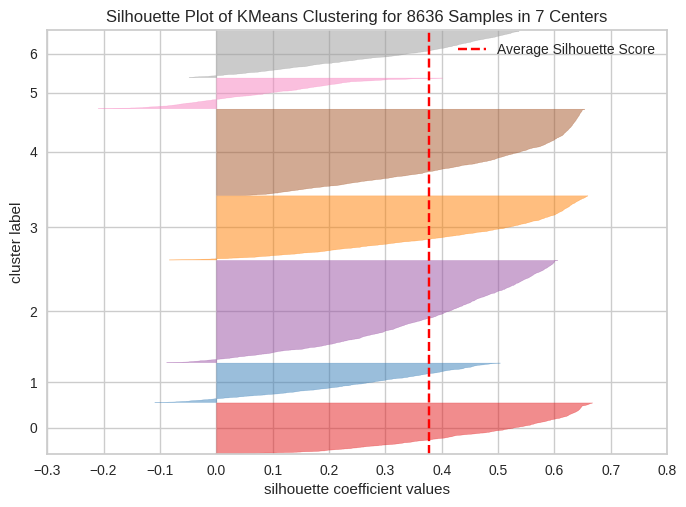

For n_clusters = 8, silhouette score is 0.3692388388111327


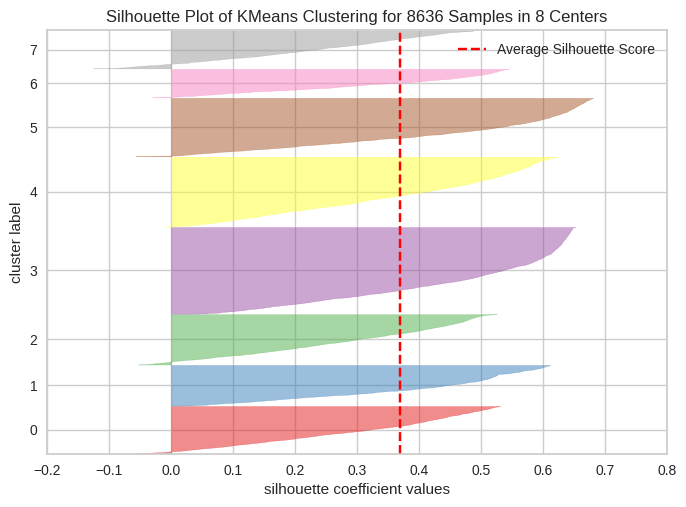

For n_clusters = 9, silhouette score is 0.35589263866035814


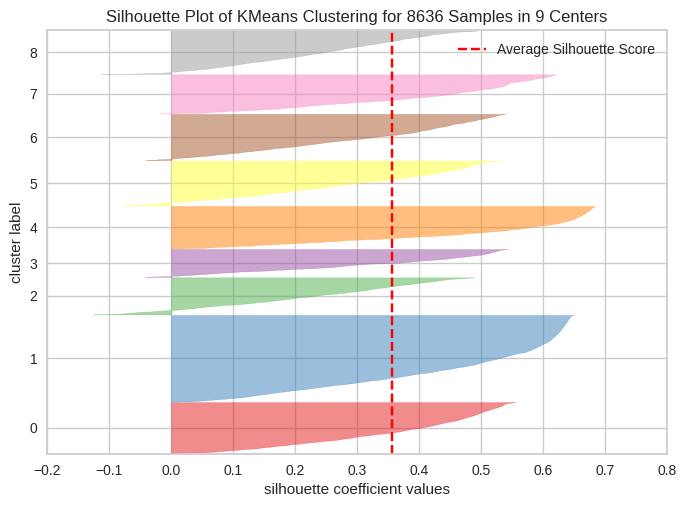

In [ ]:
silhouette_analysis(10)

Using ParameterSampler for Best Silhouette Score and best number of clusters.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterSampler
from scipy.stats import randint

# Define the hyperparameter grid
param_grid = {
    'n_clusters': list(range(2, 10)),         # Range of cluster numbers
    'init': ['k-means++', 'random'],          # Initialization methods
    'n_init': randint(5, 20),                 # Number of initializations
    'max_iter': randint(100, 500)             # Maximum iterations
}

# Random sampling of hyperparameter combinations
n_iter_search = 20  # Number of random combinations to try
random_params = list(ParameterSampler(param_grid, n_iter=n_iter_search, random_state=42))

# Perform Random Grid Search
best_score = -1
best_params = None
for params in random_params:
    kmeans = KMeans(
        n_clusters=params['n_clusters'],
        init=params['init'],
        n_init=params['n_init'],
        max_iter=params['max_iter'],
        random_state=42
    )
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)  # Evaluate using silhouette score

    if score > best_score:
        best_score = score
        best_params = params

# Output the best hyperparameters and score
print("Best Silhouette Score:", best_score)
print("Best Hyperparameters:", best_params)

# Final model with best hyperparameters
final_kmeans = KMeans(
    n_clusters=best_params['n_clusters'],
    init=best_params['init'],
    n_init=best_params['n_init'],
    max_iter=best_params['max_iter'],
    random_state=42
)
final_kmeans.fit(X)


Best Silhouette Score: 0.40852658684877574
Best Hyperparameters: {'init': 'random', 'max_iter': 472, 'n_clusters': 5, 'n_init': 12}


KMeans(init='random', max_iter=472, n_clusters=5, n_init=12, random_state=42)

On the basis of elbow method, sillhouette scores and parameter sampler , the optimal number of clusters is 5.

Previously during PCA, PCA with 2 components got 77% commulative variance and PCA with 3 components got 90% commulative variance.

Nows lets see the metrics scores of the models using 2 principle components and 3 principle components.

Let's check the model with 2 principle components and its Sillhouette score.

Silhouette Score for 2D PCA: 0.4770


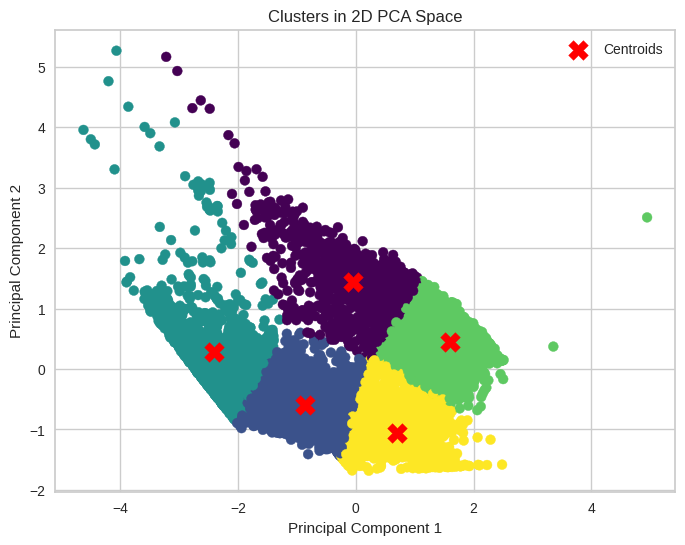

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

# KMeans Clustering
kmeans_2 = KMeans(n_clusters=5, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X_pca_2)

# Calculate Silhouette Score
silhouette_2 = silhouette_score(X_pca_2, y_kmeans_2)
print(f"Silhouette Score for 2D PCA: {silhouette_2:.4f}")

# 2D Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_kmeans_2, cmap='viridis', s=50)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
import plotly.express as px

# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X)

# KMeans Clustering
kmeans_3 = KMeans(n_clusters=5, random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X_pca_3)

# Calculate Silhouette Score
silhouette_3 = silhouette_score(X_pca_3, y_kmeans_3)
print(f"Silhouette Score for 3D PCA: {silhouette_3:.4f}")

# 3D Scatter Plot with Plotly
fig = px.scatter_3d(
    x=X_pca_3[:, 0], y=X_pca_3[:, 1], z=X_pca_3[:, 2],
    color=y_kmeans_3.astype(str),
    title='Clusters in 3D PCA Space',
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'}
)
fig.update_traces(marker=dict(size=5))
fig.show()


Silhouette Score for 3D PCA: 0.4531


Clustering with 2 principal components.

In [ ]:
# Add cluster labels to the original dataframe
engg_df['Cluster'] = y_kmeans_2  # y_km_2d is the cluster assignment from 2D PCA clustering

# Group by clusters and calculate the mean of original features for interpretation
# Select only numeric columns for calculating the mean
cluster_df = engg_df.select_dtypes(include=np.number).groupby('Cluster').mean()
cluster_df


,Credit_Utilization_Ratio,Minimum_Payment_Compliance_Ratio,Cash_Advance_Ratio,Full_Payment_Compliance_Proportion
Cluster,,,,
0,0.246960,2.275354,0.621984,0.099991
1,0.096691,1.560419,0.011998,0.103435
2,0.043769,2.484266,0.026969,0.500274
3,0.522492,0.761425,0.630796,0.004647
4,0.471280,0.731243,0.046444,0.003766


Scoring the clusters by assigning weightage to the features and get the score by multiplying weight to mean value of the features of the clusters.

In [ ]:
# Define weights
weights = {
    "Credit_Utilization_Ratio": 0.2,
    "Minimum_Payment_Compliance_Ratio": 0.4,
    "Cash_Advance_Ratio": -0.3,
    "Full_Payment_Compliance_Proportion": 0.3,
}

In [ ]:
# Calculate weighted score
cluster_df["Weighted_Score"] = (
    cluster_df["Credit_Utilization_Ratio"] * weights["Credit_Utilization_Ratio"] +
    cluster_df["Minimum_Payment_Compliance_Ratio"] * weights["Minimum_Payment_Compliance_Ratio"] +
    cluster_df["Cash_Advance_Ratio"] * weights["Cash_Advance_Ratio"] +
    cluster_df["Full_Payment_Compliance_Proportion"] * weights["Full_Payment_Compliance_Proportion"]
)

# Display the scores
print(cluster_df)

         Credit_Utilization_Ratio  Minimum_Payment_Compliance_Ratio  \
Cluster                                                               
0                        0.246960                          2.275354   
1                        0.096691                          1.560419   
2                        0.043769                          2.484266   
3                        0.522492                          0.761425   
4                        0.471280                          0.731243   

         Cash_Advance_Ratio  Full_Payment_Compliance_Proportion  \
Cluster                                                           
0                  0.621984                            0.099991   
1                  0.011998                            0.103435   
2                  0.026969                            0.500274   
3                  0.630796                            0.004647   
4                  0.046444                            0.003766   

         Weighted_Score  
Cluste

Creating an algorithm for assigning the name of the cluster based on the weight scores.

In [ ]:
# Define ranges and corresponding cluster names
def assign_cluster_name(score):
    if score > 1.0:
        return "Prime Borrowers"
    elif 0.8 <= score <= 1.0:
        return "Stable Credit Users"
    elif 0.6 <= score < 0.8:
        return "Emerging Risk Users"
    elif 0.3 <= score < 0.6:
        return "Potential Defaulters"
    else:
        return "Chronic Defaulters"

# Apply the function to create a new column with cluster names
cluster_df["Cluster_Name"] = cluster_df["Weighted_Score"].apply(assign_cluster_name)

# Display the DataFrame with cluster names
print(cluster_df)


         Credit_Utilization_Ratio  Minimum_Payment_Compliance_Ratio  \
Cluster                                                               
0                        0.246960                          2.275354   
1                        0.096691                          1.560419   
2                        0.043769                          2.484266   
3                        0.522492                          0.761425   
4                        0.471280                          0.731243   

         Cash_Advance_Ratio  Full_Payment_Compliance_Proportion  \
Cluster                                                           
0                  0.621984                            0.099991   
1                  0.011998                            0.103435   
2                  0.026969                            0.500274   
3                  0.630796                            0.004647   
4                  0.046444                            0.003766   

         Weighted_Score         

**Explanation of Cluster Names**

Prime Borrowers (Cluster 2):

These are ideal customers for lenders, demonstrating excellent financial behavior and low risk.

Stable Credit Users (Cluster 0):

These users have a consistent and moderate approach to using credit and maintaining payments.

Emerging Risk Users (Cluster 1):

A group with slightly riskier behavior that could escalate without proper guidance or intervention.

Potential Defaulters (Cluster 4):

Customers beginning to show signs of financial strain and might benefit from financial counseling or restructuring.

Chronic Defaulters (Cluster 3):

High-risk borrowers with a pattern of missed payments, high credit utilization, and heavy reliance on cash advances.

Visualizing the clusters along with clusters name and their centroid.

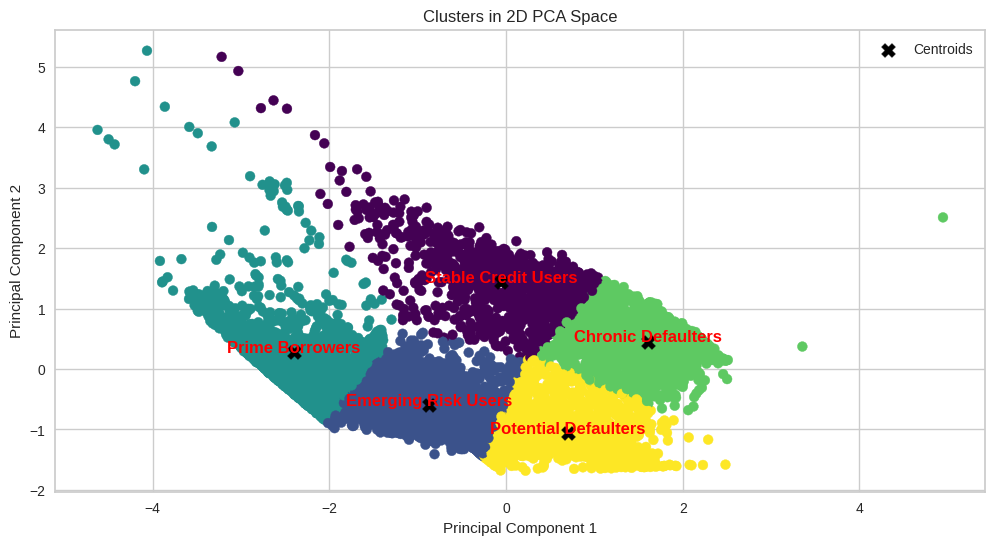

In [ ]:
# Plot with annotations
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    X_pca_2[:, 0], X_pca_2[:, 1],
    c=y_kmeans_2, cmap='viridis', s=50
)
plt.scatter(
    kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1],
    c='black', marker='X', s=100, label='Centroids'
)

# Add cluster names at centroids
# Accessing 'Cluster_Name' from the DataFrame
Cluster_Name = cluster_df['Cluster_Name'].values  # Accessing the column as a list
for i, (x, y) in enumerate(kmeans_2.cluster_centers_):
    plt.text(
        x, y, Cluster_Name[i],
        fontsize=12, fontweight='bold', color='red', ha='center'
    )

plt.title('Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.show()

Clustering with 3 principal components.

In [ ]:
# Creating a new dataframe for 3 principal componenets.
df_3_c = engg_df.copy()
df_3_c.drop(columns=['Cluster'], inplace=True)
# Creating a column named cluster with having values predicted by PCA with 3 components.
df_3_c['Cluster'] = y_kmeans_3
# Group by clusters and calculate the mean of original features for interpretation
# Select only numeric columns for calculating the mean
cluster_df_3_c = df_3_c.select_dtypes(include=np.number).groupby('Cluster').mean()
cluster_df_3_c

,Credit_Utilization_Ratio,Minimum_Payment_Compliance_Ratio,Cash_Advance_Ratio,Full_Payment_Compliance_Proportion
Cluster,,,,
0,0.249374,2.302689,0.621170,0.093880
1,0.430169,0.755146,0.038974,0.006359
2,0.040915,2.100458,0.026008,0.571317
3,0.525476,0.745088,0.627700,0.006003
4,0.093684,1.934381,0.013655,0.079281


In [ ]:
# Calculate weighted score
cluster_df_3_c["Weighted_Score"] = (
    cluster_df_3_c["Credit_Utilization_Ratio"] * weights["Credit_Utilization_Ratio"] +
    cluster_df_3_c["Minimum_Payment_Compliance_Ratio"] * weights["Minimum_Payment_Compliance_Ratio"] +
    cluster_df_3_c["Cash_Advance_Ratio"] * weights["Cash_Advance_Ratio"] +
    cluster_df_3_c["Full_Payment_Compliance_Proportion"] * weights["Full_Payment_Compliance_Proportion"]
)

# Display the scores
print(cluster_df_3_c)

         Credit_Utilization_Ratio  Minimum_Payment_Compliance_Ratio  \
Cluster                                                               
0                        0.249374                          2.302689   
1                        0.430169                          0.755146   
2                        0.040915                          2.100458   
3                        0.525476                          0.745088   
4                        0.093684                          1.934381   

         Cash_Advance_Ratio  Full_Payment_Compliance_Proportion  \
Cluster                                                           
0                  0.621170                            0.093880   
1                  0.038974                            0.006359   
2                  0.026008                            0.571317   
3                  0.627700                            0.006003   
4                  0.013655                            0.079281   

         Weighted_Score  
Cluste

In [ ]:
# Apply the function to create a new column with cluster names
cluster_df_3_c["Cluster_Name"] = cluster_df_3_c["Weighted_Score"].apply(assign_cluster_name)

# Display the DataFrame with cluster names
print(cluster_df_3_c)

         Credit_Utilization_Ratio  Minimum_Payment_Compliance_Ratio  \
Cluster                                                               
0                        0.249374                          2.302689   
1                        0.430169                          0.755146   
2                        0.040915                          2.100458   
3                        0.525476                          0.745088   
4                        0.093684                          1.934381   

         Cash_Advance_Ratio  Full_Payment_Compliance_Proportion  \
Cluster                                                           
0                  0.621170                            0.093880   
1                  0.038974                            0.006359   
2                  0.026008                            0.571317   
3                  0.627700                            0.006003   
4                  0.013655                            0.079281   

         Weighted_Score         

Importing silhouette_score, calinski_harabasz_score and davies_bouldin_score from sklearn matrics for finalizing between the models with 2 components and 3 components.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_2 = silhouette_score(X_pca_2, y_kmeans_2)
silhouette_3 = silhouette_score(X_pca_3, y_kmeans_3)

# Calinski-Harabasz Index
ch_score_2 = calinski_harabasz_score(X_pca_2, y_kmeans_2)
ch_score_3 = calinski_harabasz_score(X_pca_3, y_kmeans_3)

# Davies-Bouldin Score
db_score_2 = davies_bouldin_score(X_pca_2, y_kmeans_2)
db_score_3 = davies_bouldin_score(X_pca_3, y_kmeans_3)

print("----------------------------------------------------")
print("Silhouette Score (2D PCA):", silhouette_2)
print("Silhouette Score (3D PCA):", silhouette_3)
print("----------------------------------------------------")
print("Calinski-Harabasz Index (2D PCA):", ch_score_2)
print("Calinski-Harabasz Index (3D PCA):", ch_score_3)
print("----------------------------------------------------")
print("Davies-Bouldin Score (2D PCA):", db_score_2)
print("Davies-Bouldin Score (3D PCA):", db_score_3)
print("----------------------------------------------------")


----------------------------------------------------
Silhouette Score (2D PCA): 0.4769910908873533
Silhouette Score (3D PCA): 0.4531478664142724
----------------------------------------------------
Calinski-Harabasz Index (2D PCA): 12116.497452050891
Calinski-Harabasz Index (3D PCA): 8428.980616097091
----------------------------------------------------
Davies-Bouldin Score (2D PCA): 0.6818406085831002
Davies-Bouldin Score (3D PCA): 0.792170473118142
----------------------------------------------------


# **NOTE**

**On the basis of scores of silhouette_score, calinski_harabasz_score and davies_bouldin_score, we can clearly choose the model with 2 principal components.**

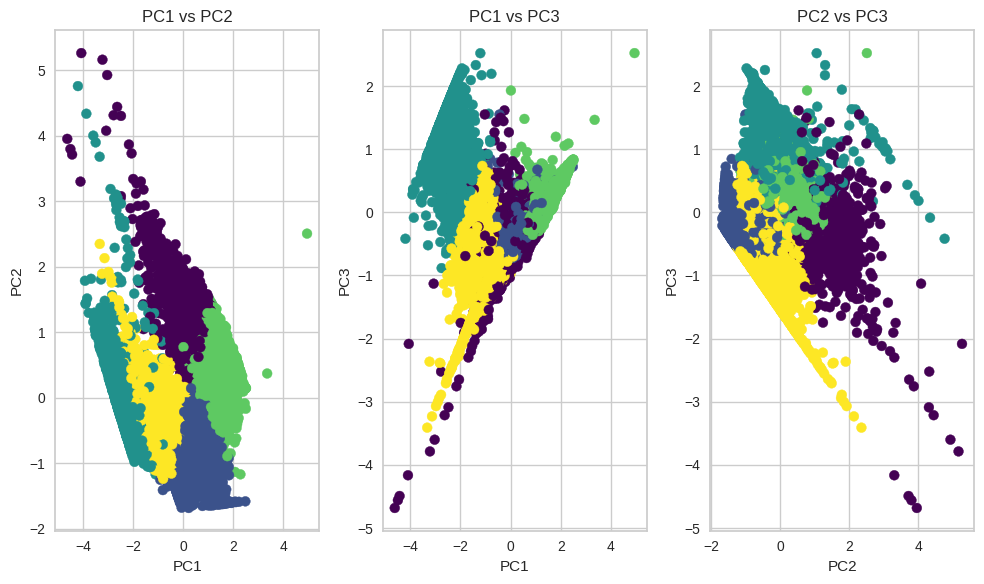

In [ ]:
# Scatter plots for different pairs of PCA components
plt.figure(figsize=(10, 6))

# PC1 vs PC2
plt.subplot(1, 3, 1)
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 1], c=y_kmeans_3, cmap='viridis', s=50)
plt.title('PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

# PC1 vs PC3
plt.subplot(1, 3, 2)
plt.scatter(X_pca_3[:, 0], X_pca_3[:, 2], c=y_kmeans_3, cmap='viridis', s=50)
plt.title('PC1 vs PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')

# PC2 vs PC3
plt.subplot(1, 3, 3)
plt.scatter(X_pca_3[:, 1], X_pca_3[:, 2], c=y_kmeans_3, cmap='viridis', s=50)
plt.title('PC2 vs PC3')
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.tight_layout()
plt.show()


# **Conclusion**

This project demonstrates the use of feature engineering and clustering techniques to analyze customer credit behavior and identify distinct risk profiles within a credit portfolio. By leveraging principal component analysis (PCA) and clustering models like K-Means, we successfully grouped customers into well-defined segments that offer actionable insights into their credit usage and repayment behaviors. After evaluating models with both 2 and 3 principal components, the 2-component model was chosen due to its superior performance based on interpretability, silhouette score, and visual clarity.


The final clusters include:

**Stable Credit Users:** Low risk, disciplined repayment patterns, optimal credit usage.

**Emerging Risk Users:** Moderate risk, inconsistent payment compliance but manageable.

**Prime Borrowers:** Exemplary users with high compliance and low risk.

**Chronic Defaulters:** High risk, poor compliance, and over-leveraged.

**Potential Defaulters:** At-risk group with warning signs of default.

#**Innovative Business Ideas**

1. Targeted Credit Line Adjustments:

 *   Offer credit line increases or promotional interest rates to Prime Borrowers and Stable Credit Users, rewarding them for good financial behavior.
 *   Implement stricter controls or conditional increases for Potential Defaulters and Chronic Defaulters.

2. Behavior-Based Rewards Program:

 *  Launch a rewards program encouraging repayment discipline. For example:
    * Cashback or loyalty points for consistent minimum payment compliance.
    * Discounts on interest rates for maintaining a low credit utilization ratio over time.

3. Custom Credit Products:

 *  Design installment-based loans or restructuring options for Emerging Risk Users to help them transition into Stable Credit Users.
 *  Create prepaid credit options for Chronic Defaulters to reduce the likelihood of default while offering an opportunity to rebuild credit.

4. AI-Driven Alerts & Recommendations:

 *  Integrate AI-based financial advisory tools that alert users about their credit utilization and recommend strategies to optimize payments. For example:
    *  Notifications when utilization exceeds 30% (risky behavior).
    *  Personalized plans to improve full payment compliance.

5. Predictive Risk Management:

 * Use clustering results to train predictive models that identify early warning signals for defaulters.
 * Proactively engage Potential Defaulters with educational resources, financial counseling, or hardship support programs.

6. Portfolio Risk Balancing:

 * Diversify the customer base by targeting marketing campaigns to attract more Stable Credit Users and Prime Borrowers, balancing the overall portfolio risk.

#**Impact and Future Scope**
This project equips financial institutions with tools to:

* Reduce credit risk by identifying high-risk segments.
* Increase profitability through targeted offers and optimized resource allocation.
* Enhance customer satisfaction by offering tailored credit solutions.

Future improvements could include the integration of time-series data to track user behavior trends, and the development of dynamic clustering models that adapt as customer behavior changes. Additionally, exploring alternative clustering algorithms (e.g., DBSCAN or Hierarchical Clustering) could provide further segmentation precision.